The codes used in this workbook has been extracted from the following sources:
1) Class lecture notes and solutions
2) Youtube Channel Data School (https://www.youtube.com/channel/UCnVzApLJE2ljPZSeQylSEyg)
3) Course book : Machine learning through Python

Hypothesis and Backrgound: The global financial crisis of 2008 raised a lot of questions about the role of banks in the functioning of the economy. We saw rapid decline in the stock prices of banks and financial instititions which were once deemed as too big to fail, ended in failure. In this project, effort will be made to analyse the reasons behind bank faiure and which aspects of the bank balance sheet remains to be the most important to avert bank failure. In this process, there are going to be various variables including the liquidity,capital,profitability and leverage to decipher the nexus of bank failure. 

Model: The analysis would consist of logisitic regression accoumpanied by KNN, PCA, Matthew Correlation Coeffient,
F1, confusion matrix, variance analysis etc score to understand the process. The research will first begin by calculating bank ratios to provide more in depth analysis of the various components of the bank balance sheet. The reason for selection of the logitisitc regression as the bank status was binary i.e. 0 or 1 to indicate whether the bank is active or failed in a particular period of time. 

Source of Data: The bank financial data has been extracted through the Federal Reserve Bank of Chicago and bank failure data has been extracted through Federal Deposit Insurance Corporation. Both the data have been merged through the FDIC unique identifier to deduce the bank financial postion and their respective position i.e. whether they are active or failed banks in the market at the moment. The analysis consist of quarterly data from 2007 to 2010.

In [2]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

import pylab as pl
from math import e, pi, isinf

In [3]:
file1 = 'C:/Users/omer qureshi/Desktop/ECON628-01-omerqureshi84/Compiled data/new compiled for final use.xlsx'
df = pd.read_excel(file1)


# Exploratory data analysis

In [4]:
#Calculating the null values in the dataset
print df.isnull().sum()

Date                                                                                                                                        0
Cash And Balances Due From Depository Institutions                                                                                        188
Interest-Bearing Balances                                                                                                                3999
Noninterest-Bearing Balances And Currency And Coin                                                                                       3961
Total Loans And Leases, Gross                                                                                                             685
TOTAL LOANS AND LEASE FINANCE RECEIVABLES: NONACCRUAL                                                                                     207
AVAILABLE-FOR-SALE SECURITIES, TOTAL                                                                                                      707
Unearn

In [5]:
#Dropping the null values from the dataset. It is important to note here that the decision to drop null values has 
#taken after considering the type of data avaliable. 
df = df.dropna()

In [6]:
#Verifying whether the null values have been dropped
print df.isnull().sum()

Date                                                                                                                                     0
Cash And Balances Due From Depository Institutions                                                                                       0
Interest-Bearing Balances                                                                                                                0
Noninterest-Bearing Balances And Currency And Coin                                                                                       0
Total Loans And Leases, Gross                                                                                                            0
TOTAL LOANS AND LEASE FINANCE RECEIVABLES: NONACCRUAL                                                                                    0
AVAILABLE-FOR-SALE SECURITIES, TOTAL                                                                                                     0
Unearned Income On Loans   

In [7]:
# Exploring the preliminary data for analysis
df.pivot_table(columns='Bank Status')

Bank Status,0,1
"AVAILABLE-FOR-SALE SECURITIES, TOTAL",6.623243e+04,6.064361e+04
Accrued Interest Receivable,2.059195e+03,2.483686e+03
Accrued Interest Receivable.1,2.059195e+03,2.483686e+03
Accumulated Other Comprehensive Income,-1.550405e+02,-1.159401e+03
Accumulated Other Comprehensive Income.1,-1.550405e+02,-1.159401e+03
All Other Assets (100% Risk-Weight),1.955252e+04,3.870754e+04
All Other Liabilities,3.613827e+03,9.913743e+02
All Time And Savings Deposits Held In Ira And Keogh Plan Accounts,1.767570e+04,2.096040e+04
Allowance For Loan And Lease Losses,5.234355e+03,1.662448e+04
Applicable Income Taxes,6.594490e+02,-8.847382e+02


In [8]:
#Calculating the bank failure by state
failure_by_year = df.pivot_table(index='Bank Status', columns='State', values='Legal Name', aggfunc='count')
failure_by_year.head()

State,AL,AR,AZ,CA,CO,FL,GA,IL,KS,LA,...,PA,PR,SC,SD,TX,UT,WA,WI,WY,active
Bank Status,,,,,,,,,,,,,,,,,,,,,
0,20.0,18.0,74.0,269.0,25.0,342.0,469.0,367.0,57.0,11.0,...,28.0,36.0,38.0,9.0,54.0,47.0,147.0,24.0,9.0,115270.0
1,2.0,2.0,18.0,27.0,3.0,60.0,68.0,46.0,6.0,1.0,...,2.0,3.0,3.0,1.0,15.0,5.0,25.0,3.0,1.0,NaN


In [9]:
#Calculating the bank failure by state
failure_by_year = df.pivot_table(index='Bank Status', columns='City', values='Legal Name', aggfunc='count')
failure_by_year.head()

City,Acworth,Albuquerque,Alpharetta,Altus,Anthony,Antioch,Arcola,Arlington,Atlanta,Aurora,...,Westmont,Williamsville,Wilmington,Winchester,Winder,Woodbury,Woodland Hills,Woodstock,Worth,active
Bank Status,,,,,,,,,,,,,,,,,,,,,
0,13.0,12.0,15.0,9.0,8.0,11.0,12.0,13.0,57.0,21.0,...,10.0,9.0,16.0,9.0,22.0,9.0,14.0,9.0,9.0,115270.0
1,1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118360 entries, 12 to 124905
Data columns (total 98 columns):
Date                                                                                                                                     118360 non-null int64
Cash And Balances Due From Depository Institutions                                                                                       118360 non-null float64
Interest-Bearing Balances                                                                                                                118360 non-null float64
Noninterest-Bearing Balances And Currency And Coin                                                                                       118360 non-null float64
Total Loans And Leases, Gross                                                                                                            118360 non-null float64
TOTAL LOANS AND LEASE FINANCE RECEIVABLES: NONACCRUAL                                

In [11]:
df1 = df.copy()

In [12]:
df.shape

(118360, 98)

In [13]:
#Extracting the list of banks in dataset
banks_in_data_set = df['Legal Name']
myset = set(banks_in_data_set)
print myset

set([u'INDEPENDENT BANK OF AUSTIN, SSB', u'CHARTER BANK EAU CLAIRE', u'TRI-COUNTY BANK', u'UPPER PENINSULA STATE BANK', u'PALISADES NATIONAL BANK, THE', u'UNITED BANK OF PHILADELPHIA', u'AMERICAN CONTINENTAL BANK', u'ANDOVER BANK, THE', u'TOWN & COUNTRY BANK', u'FIRST MIDWEST BANK OF THE OZARKS', u'REGENT BANK', u'FIRSTBANK OF BRECKENRIDGE', u'UNION SAVINGS BANK', u'BANKERS BANK NORTHEAST', u'ROCKY MOUNTAIN BANK', u'NATIONAL BANK OF MIDDLEBURY', u'BUSINESS BANK OF TEXAS, NATIONAL ASSOCIATION', u'FIRST CENTRAL STATE BANK', u'REPUBLIC FIRST BANK', u'FIRST PEOPLES BANK', u'CITIZENS NATIONAL BANK OF CHEBOYGAN', u'NATIONAL BANK OF FREDERICKSBURG, THE', u'BANK OF BROOKHAVEN', u'BUSINESS BANK, THE', u'FIRST NATIONAL BANK OF WAMEGO, THE', u'UNIVERSITY NATIONAL BANK', u'PACIFIC ALLIANCE BANK', u'NORTH COUNTY BANK', u'CUMBERLAND SECURITY BANK, INC.', u'REDSTONE BANK, N.A.', u'STRASBURG SAVINGS', u'LANGFORD STATE BANK', u'BAILEYVILLE STATE BANK', u'WEST CENTRAL BANK', u'BANK OF FOREST', u'ANAWON 

In [14]:
#Extracting the list of states in which the banks have failed
failed_banks_states = df['State']
myset = set(failed_banks_states)
print myset

set([u'WA', u'WI', u'FL', u'WY', u'PR', u'NJ', u'NM', u'TX', u'LA', u'NC', u'NE', u'NY', u'PA', u'NV', u'CO', u'CA', u'AL', u'AR', u'IL', u'GA', u'active', u'OK', u'AZ', u'MD', u'MA', u'OH', u'UT', u'MO', u'MN', u'MI', u'KS', u'MS', u'SC', u'OR', u'SD'])


In [15]:
#Extracting the list of cities in which the banks have failed
failed_banks_cities = df['City']
myset = set(failed_banks_cities)
print myset

set([u'Arlington', u'Marco Island', u'Ridgewood', u'Saint Marys', u'Covington', u'Spartanburg', u'San Francisco', u'Worth', u'Henderson', u'Milford', u'Oakdale', u'Flagstaff', u'Otsego', u'Newnan', u'Scottsdale', u'Berkeley', u'Atlanta', u'Batesville', u'Tampa', u'Redlands', u'Lynnwood', u'Bala Cynwyd', u'Bradenton', u'Ellijay', u'Woodland Hills', u'Loganville', u'Miami', u'Hancock', u'Creve Coeur', u'Port Huron', u'Topeka', u'Kaysville', u'Stockton', u'New Prague', u'Reno', u'Chesterfield', u'McDonough', u'Chico', u'Leeton', u'Lantana', u'Bellingham', u'Pine City', u'Orland Park', u'Savannah', u'Lakeview', u'Jupiter', u'Jasper', u'Seattle', u'Greeley', u'Naperville', u'Warren', u'San Juan', u'Pueblo', u'Dawsonville', u'Jackson', u'Winchester', u'Sioux Falls', u'Paola', u'Granite Bay', u'Crawfordville', u'Villa Rica', u'Bremerton', u'Burlington', u'Butler', u'Carrabelle', u'Champlin', u'Mayaguez', u'Eugene', u'Elizabeth', u'Draper', u'Aurora', u'San Diego', u'Albuquerque', u'Oregon', u

In [16]:
Fail = df['Bank Status'] == 0

In [17]:
df.head(1)

,Date,Cash And Balances Due From Depository Institutions,Interest-Bearing Balances,Noninterest-Bearing Balances And Currency And Coin,"Total Loans And Leases, Gross",TOTAL LOANS AND LEASE FINANCE RECEIVABLES: NONACCRUAL,"AVAILABLE-FOR-SALE SECURITIES, TOTAL",Unearned Income On Loans,Premises And Fixed Assets (Including Capitalized Leases),Other Assets,...,Total Risk-Based Capital Ratio.1,Other Assets - Totals,Legal Name,Primary Aba Number,Fdic Certificate Id,Bank Status,Date of closing,City,State,Acquiring bank name
12,20101231,9385.0,8795.0,590.0,72112.0,9075.0,6283.0,0.0,2087.0,1217.0,...,6.14,7712.0,1ST ADVANTAGE BANK,81019120,57899,0,active,active,active,active


In [18]:
Active = df['Bank Status'] == 1

# Ratio calculation for bank analysis

In [19]:
#Generating interest bearing assets

df['interestassets'] = df['Quarterly Average Of Total Assets'] - df['Premises And Fixed Assets (Including Capitalized Leases)']

Explanationa: Interest bearing assets are a good guide to decipher the profitability of the bank. Items such as fixed premises do not provide any income to the bank so therefore it is not best practice to include them in liquidity and profitability calculation.

In [20]:
# Creating variable for net interest margin
df['NIM'] = df['Net Interest Income']/df['interestassets']

Explanation: It is a measure of the difference between the interest income generated by banks or other financial institutions and the amount of interest paid out to their lenders (for example, deposits), relative to the amount of their (interest-earning) assets.

In [21]:
#Calculating the net profit margin
df['NPM'] = df['Net Income (Loss)']/df['Total Interest And Noninterest Income']

Explanation: is a measure of the difference between the interest income generated by banks or other financial institutions and the amount of interest paid out to their lenders (for example, deposits), relative to the amount of their (interest-earning) assets.

In [22]:
#Creating variable for capital adequacy ratio
df['Capital adequacy'] = df['Tier 1 Capital Allowable Under The Risk-Based Capital Guidelines'] + df['Tier 2 Capital Allowable Under The Risk-Based Capital Guidelines']/df['Total Assets, Derivatives, And Off-Balance Sheet Items By Risk Weight Category - 100%']


Explanation: The capital adequacy ratio (CAR) is a measure of a bank's capital. It is expressed as a percentage of a bank's risk weighted credit exposures.Also known as capital-to-risk weighted assets ratio (CRAR), it is used to protect depositors and promote the stability and efficiency of financial systems around the world. Two types of capital are measured: tier one capital, which can absorb losses without a bank being required to cease trading, and tier two capital, which can absorb losses in the event of a winding-up and so provides a lesser degree of protection to depositors.

In [23]:
#Calculating the return on equity
df['ROE'] = df['Net Income (Loss)']/df['Total Equity Capital']

Explanation: is the amount of net income returned as a percentage of shareholders equity. Return on equity measures a corporation's profitability by revealing how much profit a company generates with the money shareholders have invested.

In [24]:
#Calculating return on assets
df['ROA'] = df['Net Income (Loss)']/df['Quarterly Average Of Total Assets']

Explanation: is a financial ratio that shows the percentage of profit a company earns in relation to its overall resources. It is commonly defined as net income divided by total assets. Net income is derived from the income statement of the company and is the profit after taxes.

In [25]:
# Calculating the divident payout ratio
df['Dividend Payout ratio'] = df['Cash Dividend Declared - Equity Capital']/df['Net Income (Loss)']

Explanation: It is the amount of dividends paid to stockholders relative to the amount of total net income of a company. The amount that is not paid out in dividends to stockholders is held by the company for growth. The amount that is kept by the company is called retained earnings.

In [26]:
# Calculating the sustainable growth rate
df['Sustainable growth rate'] =(1 - df['Dividend Payout ratio']) * df['ROE']

Explanation: is the rate at which a company can grow without having to borrow money to fund its growth.  In other words, it’s the maximum rate at which a company can grow while limited to using its own internally generated revenue to fund that growth. The sustainable growth rate is used by businesses to plan long-term growth, capital acquisitions, cash flow projections and borrowing strategies.

In [27]:
#Calculating the loan to deposit ratio
df['Loan to deposit ratio'] = df['Quarterly Average Of Total Loans']/(df['Deposits: Noninterest-Bearing']+df['Total Interest-Bearing Deposits In Foreign And Domestic Offices'])

Explanation: The loan-to-deposit ratio (LTD) is a commonly used statistic for assessing a bank's liquidity by dividing the bank's total loans by its total deposits. This number is expressed as a percentage. If the ratio is too high, it means that the bank may not have enough liquidity to cover any unforeseen fund requirements, and conversely

In [28]:
#Calculating times interest earned ratio
df['Times Interest earned'] = df['Income (Loss) Before Applicable Income Taxes And Discontinued Operations']/df['Total Interest Expense']


Explanation: It is a measure of a company's ability to honor its debt payments. It may be calculated as either EBIT or EBITDA divided by the total interest payable. Interest Charges = Traditionally "charges" refers to interest expense found on the income statement.Explanation: 

In [29]:
#Calculating percentage of provision to total loans
df['Provision to total loans'] = (df['Provision For Loan And Lease Losses'] + df['Allowance For Loan And Lease Losses'])/df['Quarterly Average Of Total Loans']


Explanation: Loan loss provision is an expense set aside as an allowance for uncollected loans and loan payments. This provision is used to cover a number of factors associated with potential loan losses including bad loans, customer defaults and renegotiated terms of a loan that incur lower than previously estimated payments. Loan loss provisions are an adjustment to loan loss reserves and can also be known as valuation allowances. 


In [30]:
df.groupby(['Bank Status'], sort=True)[['Provision to total loans']].mean().sort_values(by=['Provision to total loans'], ascending=False).reset_index

<bound method DataFrame.reset_index of              Provision to total loans
Bank Status                          
0                                 inf
1                            0.073969>

In [31]:
#Calculating the current account saving account ratio:
df['CASA'] = df['Total Demand Deposits (See Note Below)']/df['Deposits: Noninterest-Bearing'] + df['Total Interest-Bearing Deposits In Foreign And Domestic Offices']

Explanation: CASA represents the low cost deposits for the bank

In [32]:
#Calculating the percentage of loans secured by real estate
df['Percentage of loans secured by real estate'] = df['Loans Secured By Real Estate']/df['Quarterly Average Of Total Loans']


In [33]:
#Calculating the financial leverage
df['Financial leverage'] = df['Total Liabilities']/df['Total Equity Capital']

Explanation: ). A high debt/equity ratio generally indicates that a company has been aggressive in financing its growth with debt. This can result in volatile earnings as a result of the additional interest expense, and if it is very high, it may increase the chances of a default or bankruptcy. 



In [34]:
#Reassigning Tier 1 Liquidity Capital Ratio
df['Tier 1 LCR'] = df['Tier 1 Leverage Capital Ratio']

In [35]:
df['Tier 1 RBC Ratio'] = df['Tier 1 Risk-Based Capital Ratio']

In [36]:
#Reassigning Risk Based Capital ratio
df['Total RBC Ratio'] = df['Total Risk-Based Capital Ratio']

In [37]:
import math
df['Log Loans Secured By Real Estate'] = np.log(df['Loans Secured By Real Estate'])

C:\Users\omer qureshi\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [38]:
#Calculating loans to equity ratio
df['Loans to Equity Ratio'] = df['Quarterly Average Of Total Loans']/df['Total Equity Capital']

In [39]:
#Calculating debt to assets ratio
df['Debt to Assets Ratio'] = df['Total Liabilities']/df['Quarterly Average Of Total Assets']

In [40]:
#Calculating debt to equity ratio
df['Debt to Equity Ratio'] = df['Total Liabilities']/df['Total Equity Capital']

In [41]:
df[df['Percentage of loans secured by real estate'].isnull()]

,Date,Cash And Balances Due From Depository Institutions,Interest-Bearing Balances,Noninterest-Bearing Balances And Currency And Coin,"Total Loans And Leases, Gross",TOTAL LOANS AND LEASE FINANCE RECEIVABLES: NONACCRUAL,"AVAILABLE-FOR-SALE SECURITIES, TOTAL",Unearned Income On Loans,Premises And Fixed Assets (Including Capitalized Leases),Other Assets,...,CASA,Percentage of loans secured by real estate,Financial leverage,Tier 1 LCR,Tier 1 RBC Ratio,Total RBC Ratio,Log Loans Secured By Real Estate,Loans to Equity Ratio,Debt to Assets Ratio,Debt to Equity Ratio
666,20101231,4661.0,4539.0,122.0,0.0,0.0,0.0,0.0,191.0,1430.0,...,NaN,NaN,0.093597,86.2500,227.4600,227.4600,-inf,0.0,0.087965,0.093597
667,20100930,4209.0,4068.0,141.0,0.0,0.0,0.0,0.0,201.0,1518.0,...,NaN,NaN,0.078063,87.7100,220.1100,220.1100,-inf,0.0,0.073979,0.078063
668,20100630,3960.0,3850.0,110.0,0.0,0.0,0.0,0.0,209.0,1458.0,...,NaN,NaN,0.074603,88.2800,219.3400,219.3400,-inf,0.0,0.071004,0.074603
669,20100331,3697.0,3493.0,204.0,0.0,0.0,0.0,0.0,222.0,1551.0,...,NaN,NaN,0.083629,86.1400,202.6800,202.6800,-inf,0.0,0.078951,0.083629
670,20091231,3856.0,3707.0,149.0,0.0,0.0,0.0,0.0,179.0,1568.0,...,NaN,NaN,0.077929,93.0800,210.6100,210.6100,-inf,0.0,0.075804,0.077929
671,20090930,3892.0,3694.0,198.0,0.0,0.0,0.0,0.0,184.0,1540.0,...,NaN,NaN,0.105596,86.6100,198.5400,198.5400,-inf,0.0,0.100008,0.105596
672,20090630,3565.0,3476.0,89.0,0.0,0.0,0.0,0.0,195.0,1450.0,...,NaN,NaN,0.093141,82.2300,200.9800,200.9800,-inf,0.0,0.086628,0.093141
673,20090331,3426.0,3284.0,142.0,0.0,0.0,0.0,0.0,196.0,1319.0,...,NaN,NaN,0.093737,78.0400,204.7800,204.7800,-inf,0.0,0.085703,0.093737
674,20081231,3153.0,3085.0,68.0,0.0,0.0,0.0,0.0,207.0,1477.0,...,NaN,NaN,0.099983,77.0200,184.8800,184.8800,-inf,0.0,0.091192,0.099983
675,20080930,4389.0,4335.0,54.0,0.0,0.0,0.0,0.0,178.0,1772.0,...,NaN,NaN,0.154571,0.7121,0.7702,0.7702,-inf,0.0,0.135658,0.154571


In [42]:
df.groupby('Bank Status').mean()

,Date,Cash And Balances Due From Depository Institutions,Interest-Bearing Balances,Noninterest-Bearing Balances And Currency And Coin,"Total Loans And Leases, Gross",TOTAL LOANS AND LEASE FINANCE RECEIVABLES: NONACCRUAL,"AVAILABLE-FOR-SALE SECURITIES, TOTAL",Unearned Income On Loans,Premises And Fixed Assets (Including Capitalized Leases),Other Assets,...,CASA,Percentage of loans secured by real estate,Financial leverage,Tier 1 LCR,Tier 1 RBC Ratio,Total RBC Ratio,Log Loans Secured By Real Estate,Loans to Equity Ratio,Debt to Assets Ratio,Debt to Equity Ratio
Bank Status,,,,,,,,,,,,,,,,,,,,,
0,2.008537e+07,22534.861347,13609.760871,8925.101570,285046.006476,6359.278484,66232.427215,174.608613,6434.658640,15256.337020,...,267352.711569,0.713178,inf,6.288421,11.556978,12.186455,-inf,6.439824,0.886182,inf
1,2.008851e+07,47562.607330,35208.274869,12354.324607,421928.405759,64076.654450,60643.607330,229.319372,8832.657068,20305.259162,...,445331.541351,0.796592,-80.252876,1.203638,1.517682,2.161787,-inf,-65.328354,0.931368,-80.252876


# Additional Data cleaning after ratio calculation

In [43]:
#Exploring whether the dataframe has null values 
df.isnull().any()

Date                                                                          False
Cash And Balances Due From Depository Institutions                            False
Interest-Bearing Balances                                                     False
Noninterest-Bearing Balances And Currency And Coin                            False
Total Loans And Leases, Gross                                                 False
TOTAL LOANS AND LEASE FINANCE RECEIVABLES: NONACCRUAL                         False
AVAILABLE-FOR-SALE SECURITIES, TOTAL                                          False
Unearned Income On Loans                                                      False
Premises And Fixed Assets (Including Capitalized Leases)                      False
Other Assets                                                                  False
Allowance For Loan And Lease Losses                                           False
Total Equity Capital                                                        

In [44]:
#Filling in the missing values with the mean
df = df.fillna(lambda x: x.mean())

In [45]:
#Checking whether the function has worked 
df.isnull().any()

Date                                                                          False
Cash And Balances Due From Depository Institutions                            False
Interest-Bearing Balances                                                     False
Noninterest-Bearing Balances And Currency And Coin                            False
Total Loans And Leases, Gross                                                 False
TOTAL LOANS AND LEASE FINANCE RECEIVABLES: NONACCRUAL                         False
AVAILABLE-FOR-SALE SECURITIES, TOTAL                                          False
Unearned Income On Loans                                                      False
Premises And Fixed Assets (Including Capitalized Leases)                      False
Other Assets                                                                  False
Allowance For Loan And Lease Losses                                           False
Total Equity Capital                                                        

In [46]:
#Verifiying the null values in the dataset
df.isnull().sum()

Date                                                                          0
Cash And Balances Due From Depository Institutions                            0
Interest-Bearing Balances                                                     0
Noninterest-Bearing Balances And Currency And Coin                            0
Total Loans And Leases, Gross                                                 0
TOTAL LOANS AND LEASE FINANCE RECEIVABLES: NONACCRUAL                         0
AVAILABLE-FOR-SALE SECURITIES, TOTAL                                          0
Unearned Income On Loans                                                      0
Premises And Fixed Assets (Including Capitalized Leases)                      0
Other Assets                                                                  0
Allowance For Loan And Lease Losses                                           0
Total Equity Capital                                                          0
Total Liabilities, Limited-Life Preferre

In [47]:
df.shape

(118360, 119)

# Implementation of supervised and unsupervised methods

In [48]:
#Feature columns to be used for logistic regression
feature_cols = ['Bank Status', 'CASA','NIM','Percentage of loans secured by real estate','Financial leverage','Provision to total loans','Times Interest earned','Loan to deposit ratio','Sustainable growth rate','Dividend Payout ratio','ROE','ROA','NPM','Capital adequacy','interestassets','Tier 1 LCR','Total RBC Ratio','Tier 1 RBC Ratio','Loans to Equity Ratio','Debt to Assets Ratio','Debt to Equity Ratio']


In [49]:
df_cream_cheese = df[feature_cols]

In [50]:
df_cream_cheese = df_cream_cheese.convert_objects(convert_numeric=True)

C:\Users\omer qureshi\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [51]:
df_cream_cheese = df_cream_cheese.replace([np.inf, -np.inf,], np.nan)

In [52]:
df_cream_cheese.isnull().sum()

Bank Status                                      0
CASA                                          2015
NIM                                              1
Percentage of loans secured by real estate    1747
Financial leverage                               1
Provision to total loans                      1747
Times Interest earned                         1287
Loan to deposit ratio                         1210
Sustainable growth rate                        115
Dividend Payout ratio                          115
ROE                                              1
ROA                                              0
NPM                                             37
Capital adequacy                                77
interestassets                                   0
Tier 1 LCR                                       0
Total RBC Ratio                                  0
Tier 1 RBC Ratio                                 0
Loans to Equity Ratio                            1
Debt to Assets Ratio           

In [53]:
df_cream_cheese.dtypes

Bank Status                                     int64
CASA                                          float64
NIM                                           float64
Percentage of loans secured by real estate    float64
Financial leverage                            float64
Provision to total loans                      float64
Times Interest earned                         float64
Loan to deposit ratio                         float64
Sustainable growth rate                       float64
Dividend Payout ratio                         float64
ROE                                           float64
ROA                                           float64
NPM                                           float64
Capital adequacy                              float64
interestassets                                float64
Tier 1 LCR                                    float64
Total RBC Ratio                               float64
Tier 1 RBC Ratio                              float64
Loans to Equity Ratio       

In [54]:
df_cream_cheese = df_cream_cheese.dropna()

In [55]:
df_cream_cheese.isnull().sum()

Bank Status                                   0
CASA                                          0
NIM                                           0
Percentage of loans secured by real estate    0
Financial leverage                            0
Provision to total loans                      0
Times Interest earned                         0
Loan to deposit ratio                         0
Sustainable growth rate                       0
Dividend Payout ratio                         0
ROE                                           0
ROA                                           0
NPM                                           0
Capital adequacy                              0
interestassets                                0
Tier 1 LCR                                    0
Total RBC Ratio                               0
Tier 1 RBC Ratio                              0
Loans to Equity Ratio                         0
Debt to Assets Ratio                          0
Debt to Equity Ratio                    

In [56]:
# formula1 = '''
# Bank Status ~ 'CASA','NIM','Percentage of loans secured by real estate','Financial leverage','Provision to total loans','Times Interest earned','Loan to deposit ratio','Sustainable growth rate','Dividend Payout ratio','ROE','ROA','NPM','Capital adequacy','interestassets','Tier 1 LCR','Total RBC Ratio','Tier 1 RBC Ratio','Loans to Equity Ratio','Debt to Assets Ratio','Debt to Equity Ratio -1'''
# formula1 = formula1.replace(",", "+")

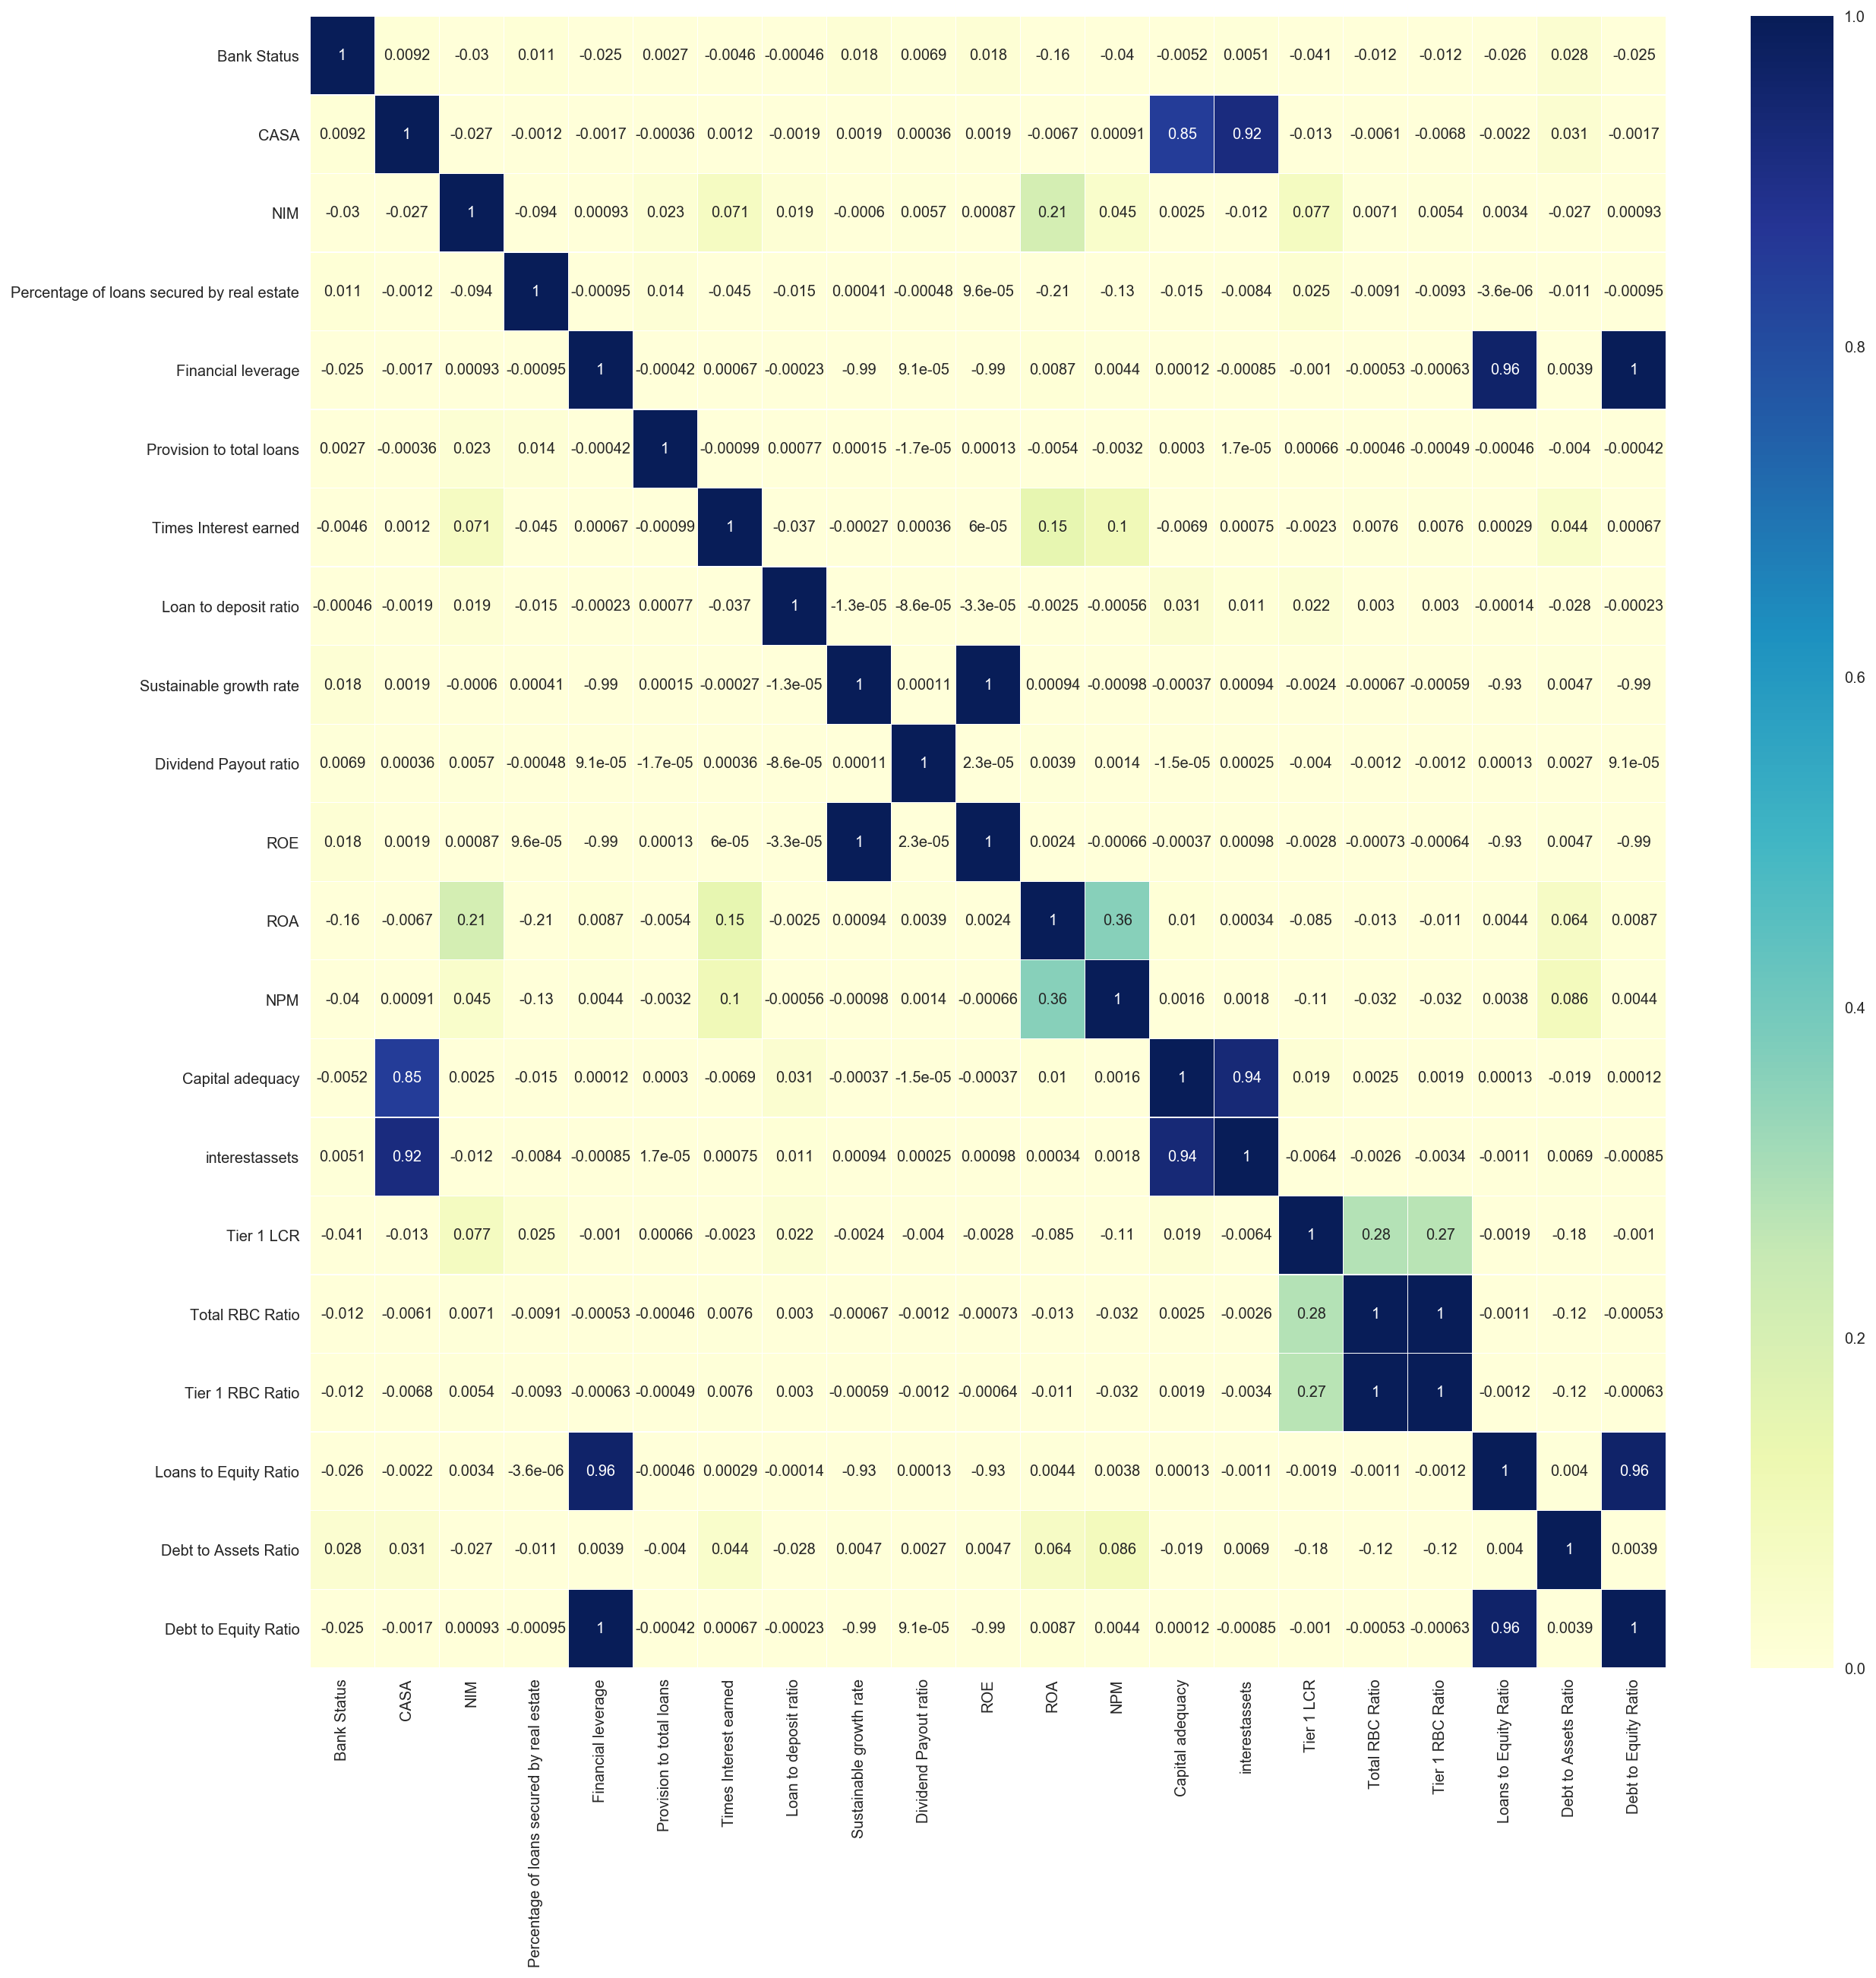

In [57]:
#Running the correlation martix to deduce the relationship between variales in the dataset
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
sns.heatmap(df_cream_cheese.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
#plt.show()

In [58]:
#Comparing the financial ratios for the failed and active banks
df_cream_cheese.pivot_table(columns='Bank Status')

Bank Status,0,1
CASA,268180.084737,445331.541351
Capital adequacy,38773.457890,17665.379767
Debt to Assets Ratio,0.896084,0.931368
Debt to Equity Ratio,8.779520,-80.252876
Dividend Payout ratio,0.377172,4.584590
Financial leverage,8.779520,-80.252876
Loan to deposit ratio,2.151669,0.887833
Loans to Equity Ratio,6.549749,-65.328354
NIM,0.022351,0.016035
NPM,0.037070,-0.813031


In [379]:
#Defining X & Y for the logistic regression
X = df_cream_cheese[feature_cols[1:]]
y = df_cream_cheese['Bank Status']

In [380]:
#Normalizing the dataset to takecare of overfitting probelm
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize

# use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(X)

In [381]:
print X.shape, y.shape

(115876, 20) (115876L,)


In [382]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [383]:
# #Regularing the variables to prevent overfitting
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std1 = sc.transform(X_train)
# X_test_std1 = sc.transform(X_test)

In [384]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [385]:
y_pred = logreg.predict(X_test)

In [386]:
from sklearn import metrics
print metrics.accuracy_score(y_test,y_pred)

0.997411025579


In [387]:
#Testing null accuracy
y_test.value_counts()

0    28885
1       84
Name: Bank Status, dtype: int64

In [388]:
#Calculating the % of ones
y_test.mean()

0.0028996513514446477

In [389]:
#Calculating the % of zeros
1 - y_test.mean()

0.9971003486485553

In [390]:
#Calculating null accuracy for binary classification models
max(y_test.mean(),1 - y_test.mean())

0.9971003486485553

In [391]:
# It can be seen is the model is very accurate in predicting the responses
print 'True:', y_test.values[0:25]
print 'Pred:', y_pred[0:25]

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Evaluating the classifier

In [392]:
print metrics.confusion_matrix(y_test,y_pred)

[[28857    28]
 [   47    37]]


In [393]:
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [394]:
#Calculating the accuracy of a model
print (TP + TN)/float(TP+TN+FP+FN)
print metrics.accuracy_score(y_test,y_pred)

0.997411025579
0.997411025579


In [395]:
#Calculating the sensitivity of the model
print TP/float(TN+FP)

0.00128094166522


In [396]:
#Calculating the specificity of the model
print TN/float(TN+FP)

0.99903063874


In [397]:
#Calculating the false positive rate
print FP/float(TN+FP)

0.00096936126017


In [398]:
#Calculating the precision score
print TP/float(TP+FP)
print metrics.precision_score(y_test,y_pred)

0.569230769231
0.569230769231


In [399]:
#Calculating the matthew correlation coefficient. The correlation coefficient of 34% indicates that the model 

import math
mcc = (TP*TN - FP*FN) / math.sqrt( (TP + FP)*(TP + FN)*(TN + FP)*(TN + FN) )
print mcc

27.0843357192


C:\Users\omer qureshi\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in long_scalars


In [400]:
#Calculating the F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.74767323522822726

In [401]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 

dec_tree = DecisionTreeClassifier()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10,15,20],
          "min_samples_split": [2, 5, 7,10,15]
         }
    
gsdt = GridSearchCV(dec_tree, params, n_jobs=-1, cv=5, verbose=1)

In [402]:
gsdt.fit(X_train,y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:  8.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7, 10, 15], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

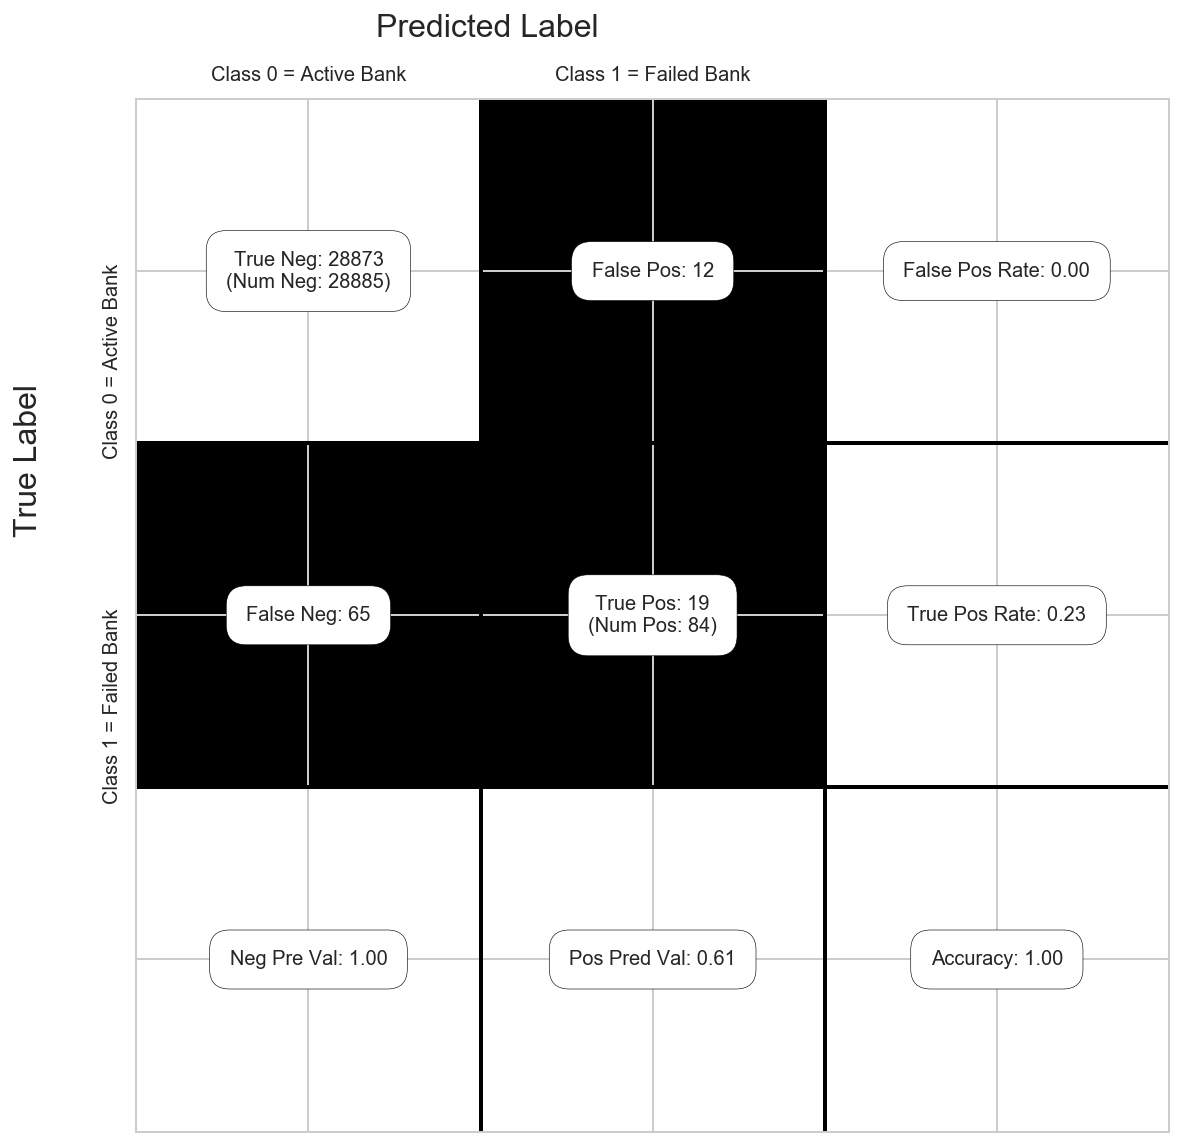

In [403]:
import imp
# from confussion import show_confusion_matrix
from sklearn.metrics import confusion_matrix

confusion = imp.load_source('confussion','C:/Users/omer qureshi/Desktop/ECON628-01/utils/stats/confussion.py')

from confussion import show_confusion_matrix

C = confusion_matrix(y_test, gsdt.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Active Bank', 'Class 1 = Failed Bank'])

Explanation: The above marix shows that the true positves were 13 while the true negatives were 71. This gives credence to the fact the macroeconomic aspects should be incorporated into the model to give a much better prediction. Furthermore, it is also to be noted that the amount of funding the particular bank recieved under Troubled Asset Relief Program should also be brought into consideration.  

In [404]:
log_best = gsdt.best_estimator_
print "Best estimators on the left out data:\n", log_best

#print "\nBest C / Regularization Param on the left out data:\n", gsdt.best_gsdt_.C 
# This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", gsdt.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % gsdt.best_score_
## Score of best_estimator on the left out data.

Best estimators on the left out data:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Best Params on hold out data (train):
{'max_features': 'auto', 'min_samples_split': 10, 'max_depth': 10, 'min_samples_leaf': 20}

Best Score on left out data:0.997 



In [405]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28885
          1       0.57      0.44      0.50        84

avg / total       1.00      1.00      1.00     28969



In [406]:
'''Baseline'''
'''Remeber that 0 is failed bank 1 is active bank'''
print df['Bank Status'].value_counts(), "\n" 
print "If I randomly choose, %.0f percent of the time I will be choosing the failed bank" % ((np.mean(df['Bank Status']))*100)

0    117978
1       382
Name: Bank Status, dtype: int64 

If I randomly choose, 0 percent of the time I will be choosing the failed bank


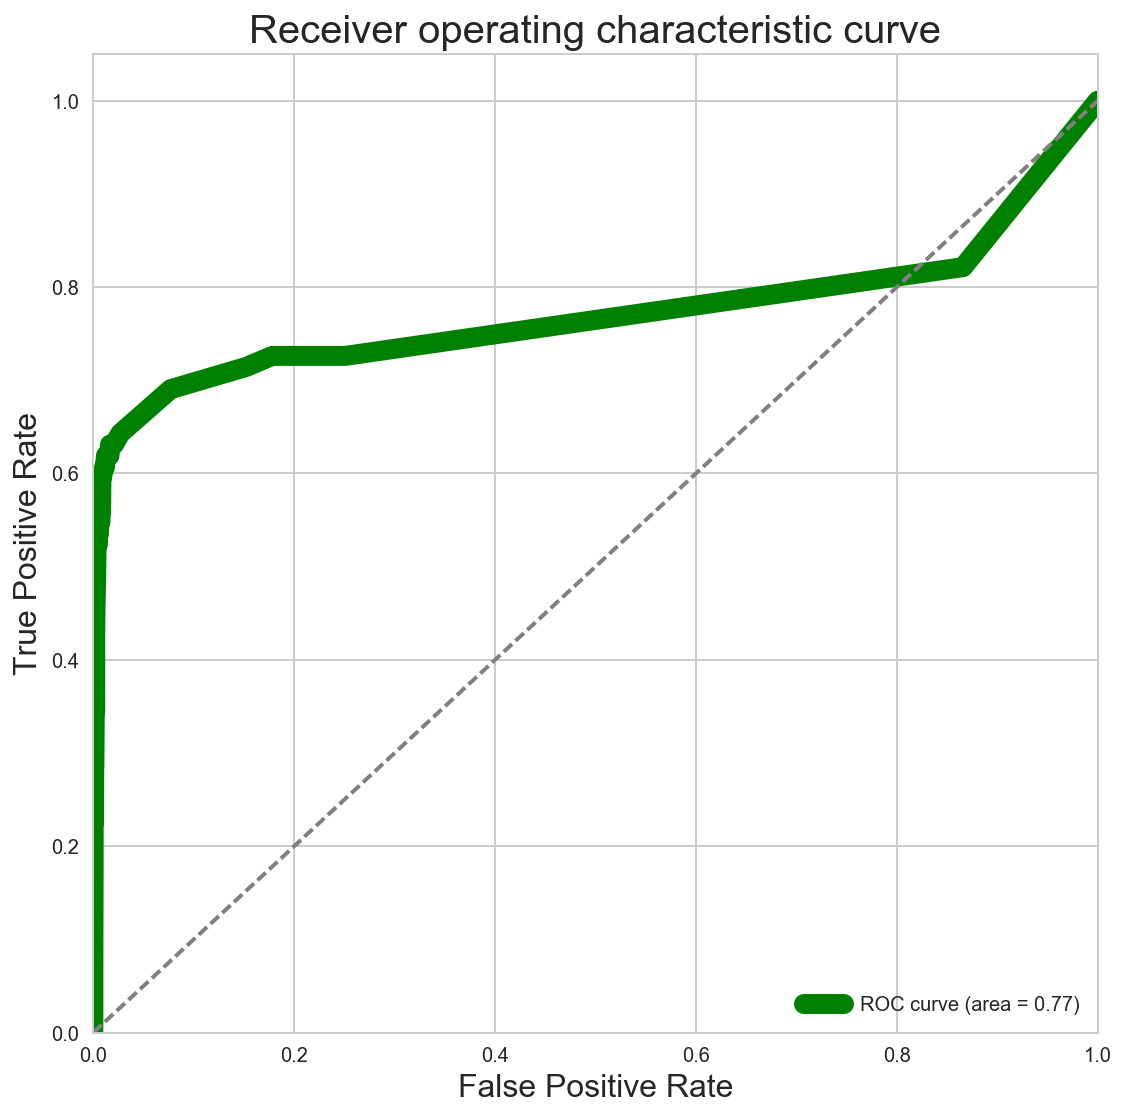

In [407]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = gsdt.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

Explanation: It can be seen from above that the ROC curve shows that the model is reasonable in predicting the outcome of the failed banks. It is generally considered a rule of thumb that any percentage between 70-80% should be classified as fair. 

In [408]:
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [409]:
feature_importance(X, log_best)

,feature,importance
17,Loans to Equity Ratio,0.348299
3,Financial leverage,0.338246
19,Debt to Equity Ratio,0.072379
18,Debt to Assets Ratio,0.041494
15,Total RBC Ratio,0.034359
14,Tier 1 LCR,0.033695
1,NIM,0.031036
16,Tier 1 RBC Ratio,0.025707
0,CASA,0.016214
2,Percentage of loans secured by real estate,0.012982


Explanation: The above results are partially in line with expectations. It comes as no surprise that the Tier 1 ratio has been considered as an siginificant classifier for bank failure. It was the banks excessive risk taking during the financial crisis that led to this. Furthermore, debt to equity again is showing as an important variable. It is interesting however to note that the percentage of the loans secured by real estate is not a significant variable. We have seen the subprime mortgage crisis and it was triggered by the depression of housing market prices. Therefore, it can be concluded that the banks can withstand major stress on their balance sheet as long as there is a strong capital base. 

In [89]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [430]:
#Plotting the decision tree - Code is fine but the graph does not run due to unspecified issues
dot_data = StringIO()


## Graph
export_graphviz(log_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
# Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Implementing KNN

In [411]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=10,scoring="accuracy")
print scores

[ 0.99672103  0.99680732  0.99680704  0.99637556  0.99680677  0.99646155
  0.99672046  0.99663416  0.99689307  0.99680677]


In [412]:
#Calculating out of sample accuracy
print scores.mean()

0.996703372406


In [413]:
#Searching for the optimal value for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring="accuracy")
    k_scores.append(scores.mean())
print k_scores
    

[0.99540886880609381, 0.99668611019343467, 0.99664295913026968, 0.99670337017189181, 0.99670337240619333, 0.99670337240606488, 0.99672063312928905, 0.99672063312928927, 0.99672063312928927, 0.99672926274613405, 0.99672926274613405, 0.99672063238452213, 0.99672063238452213, 0.99671200351231559, 0.99671200276767702, 0.99671200351231559, 0.99671200351231559, 0.99671200351231559, 0.99671200351231559, 0.99670337464010927, 0.99670337464010927, 0.99670337464010927, 0.99670337464010927, 0.99670337464010927, 0.99670337464010927, 0.99670337464010927, 0.99670337464010927, 0.99670337464010927, 0.99670337464010927, 0.99670337464010927]


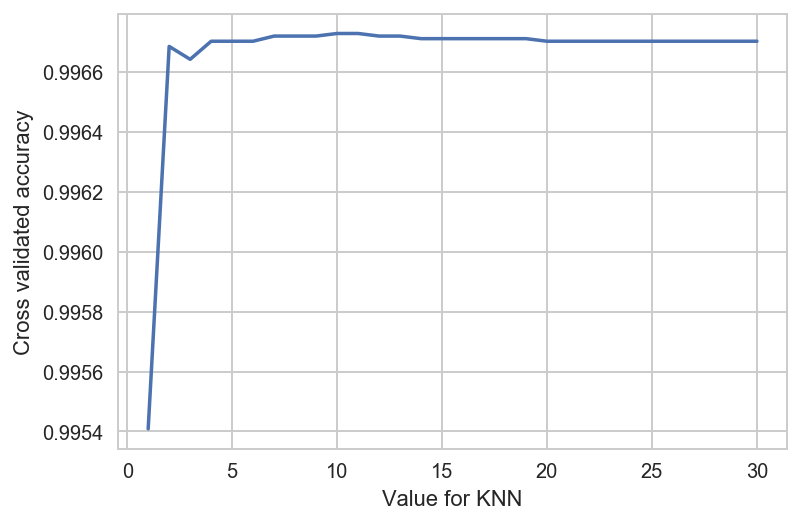

In [414]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range,k_scores)
plt.xlabel('Value for KNN')
plt.ylabel('Cross validated accuracy')

In [415]:
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn,X,y,cv=10,scoring="accuracy").mean()

0.99670337464


In [416]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
print cross_val_score(logreg1,X,y,cv=10,scoring="accuracy").mean()

0.996850077383


Based on the results above it can be concluded that both KNN and Logistic regression can be used for the analysis of the dataset as both of them give similar accuracy levels.

# Implementing the Principal Component Analysis

In [417]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [418]:
import numpy as np
from numpy.linalg import eig as eigenValuesAndVectors
import numpy.linalg as linalg
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print ('\nEigenvalues \n%s' %eigen_vals)
eigen_vals


Eigenvalues 
[  4.90371049e+00   2.81372647e+00   2.16152284e+00   1.58737404e+00
   6.28332493e-01   1.13224877e+00   7.73587689e-01   8.41604327e-01
   9.04680014e-01   1.03237205e+00   9.39908170e-01   1.00196345e+00
   9.98455228e-01   1.41584056e-01   8.90348825e-02   4.26923594e-02
   7.22956862e-03   1.93525180e-04   9.71405679e-06  -9.44455434e-17]


array([  4.90371049e+00,   2.81372647e+00,   2.16152284e+00,
         1.58737404e+00,   6.28332493e-01,   1.13224877e+00,
         7.73587689e-01,   8.41604327e-01,   9.04680014e-01,
         1.03237205e+00,   9.39908170e-01,   1.00196345e+00,
         9.98455228e-01,   1.41584056e-01,   8.90348825e-02,
         4.26923594e-02,   7.22956862e-03,   1.93525180e-04,
         9.71405679e-06,  -9.44455434e-17])

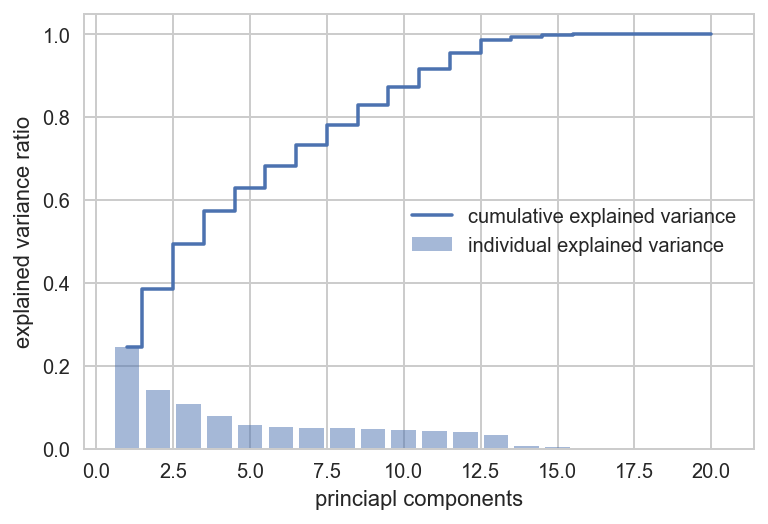

In [419]:
#Calculating the total and explained variance from the dataset
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
          sorted (eigen_vals,reverse = True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,21), var_exp, alpha = 0.5, align='center',
        label = 'individual explained variance')
plt.step(range(1,21), cum_var_exp, where='mid',
         label = 'cumulative explained variance')
plt.ylabel('explained variance ratio')
plt.xlabel('princiapl components')
plt.legend(loc='best')
plt.show()
         
        

From the graph above, it can be seen that up to 22% of the total variance has been explained by one component only and 40% of the variance has been explained by only two components.

In [420]:
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i])
              for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [421]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

('Matrix W:\n', array([[ -1.64437557e-03,   5.69537372e-01],
       [  1.10946036e-03,  -7.00773560e-03],
       [ -8.50447041e-04,  -1.28733470e-02],
       [  4.51053997e-01,   8.63409677e-04],
       [ -1.94029218e-04,  -3.62839426e-04],
       [  4.78134078e-04,  -2.21792925e-03],
       [ -5.09216388e-05,   1.26247431e-02],
       [ -4.48589456e-01,  -8.17374466e-04],
       [  1.06052089e-04,  -2.73744501e-04],
       [ -4.48586670e-01,  -8.02791292e-04],
       [  4.20991386e-03,   2.58727958e-03],
       [  2.42756255e-03,   3.86275346e-03],
       [ -3.89137947e-04,   5.74466262e-01],
       [ -1.08983433e-03,   5.87288993e-01],
       [  5.70640939e-04,  -6.22683646e-03],
       [  9.72810302e-05,  -9.26246845e-03],
       [  5.86339023e-05,  -9.60576783e-03],
       [  4.36586302e-01,   6.46716273e-04],
       [ -5.01427251e-04,   9.29079506e-03],
       [  4.51053997e-01,   8.63409677e-04]]))


In [422]:
X_train_std[0].dot(w)

array([  2.75752827e-04,  -2.87190812e-01])

In [423]:
X_train_pca = X_train_std.dot(w)

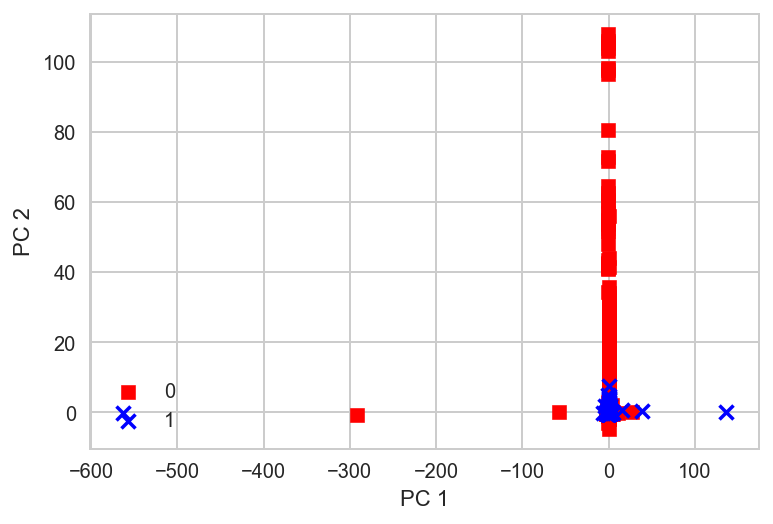

In [424]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
        plt.scatter(X_train_pca[y_train==l, 0],
            X_train_pca[y_train==l, 1],
            c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [425]:
from sklearn.preprocessing import StandardScaler
pca_n = StandardScaler().fit_transform(df_cream_cheese.iloc[:,1:-1])
pca_n[:,[0,3,6]] *= -1

In [431]:
from sklearn.decomposition import PCA
pca = PCA().fit(pca_n)

In [432]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

In [435]:
hep_pa = horn_parallel_analysis(df_cream_cheese.iloc[:,1:-1].shape, percentile=95)

In [439]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, df_cream_cheese.iloc[:,1:-1].shape[1]+1), hep_pa.cum_var_exp, lw=2)
ax.scatter(range(1, df_cream_cheese.iloc[:,1:-1].shape[1]+1), hep_pa.cum_var_exp, s=50)

ax.plot(range(1, len(hep_pa)+1), hep_pa, lw=2, color='darkred')
ax.scatter(range(1, len(hep_pa)+1), hep_pa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on data components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()

# Limitations/Weakness of research

The following are the limitations of the research:
1) Wholesale funding: There has to be further research into the wholesale funding aspect and their impact on bank failure. Due to the limit on data availability, it was not possible to explore the failed bank exposure into the various sources of wholesale funding such as mortgage backed securites, etc
2) Fed lending: The aspect of the amount of money lent to the bank by the federal reserve through discount rate is unavailable.
3) Macroeconomic factor: The macro factors such as consumer price index was not taken into consideration due to limit on time
4) Management quality: Lack of data prevented as to how far the management was responsible for bank failure. No data was available for the numnber of staff at the bank at the time of failure.

# Recommendations



The following are the recommendations:
1) Implementation of strict capital reserve ratios: There has to be nenewed legislation to prevent another financial crisis and that can only be done through strict regulatory laws. Implementation of ratios to indicate stable funding sources and prevention to invest in below-grade securities should be implemented.
2) Restriction in investment in non-investible grade securities
3) Diversification of banking portfolio
4) Creation of capital buffer: The financial crisis exposed the fact that the minimum capital requirements are not sufficient to sufficient to withstand the crisis. Therefore, a capital buffer needs to be created on the balance sheet on the respective banks to make them more resilient to cope with any future crisis.
5) Cap on wholesale funding: Wholesale funding is defined as funding which the banks borrows to finance its assets. These funding are mostly short term, unsecured and high risk. Therefore, in case of any adverse news a financial institution avenue of wholesale funding might become depressed as it is mostly unsecured and banks will be unwilling to lend money to such an institution. 6) Net Stable Funding Ratio: The bank should maintain a postive ratio so that the banks are able to sustain a shock
